In [62]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine,reflect=True)
Base.classes.keys()

['measurement', 'station']

In [7]:
#save classes
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
session.query(Station).all()

# Exploratory Climate Analysis

In [10]:
## Design a query to retrieve the last 12 months of precipitation data and plot the results

#find last date in data
LastDate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
LastDate

('2017-08-23')

In [11]:
# Calculate the date 1 year ago from the last data point in the database
YearBeforeLastDate = dt.date(2017, 8, 23) - dt.timedelta(days=365)
#convert data for filtering
DateFormat = "%Y-%m-%d"
YearBeforeLastDateString = YearBeforeLastDate.strftime(DateFormat)
YearBeforeLastDateString

'2016-08-23'

In [12]:
#save query
PrcpData = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= YearBeforeLastDateString).all()
PrcpData

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [13]:
#convert to df
PrcpDataDF = pd.DataFrame(PrcpData)

In [14]:
#sort values by date
PrcpDataDF = PrcpDataDF.sort_values('date')
#drop nulls
PrcpDataDF = PrcpDataDF.dropna()
PrcpDataDF

,date,prcp
0,2016-08-23,0.00
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
1881,2016-08-23,0.70
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


In [15]:
#reset index
IndexedPrcpDataDF = PrcpDataDF.set_index('date')
IndexedPrcpDataDF

,prcp
date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


In [16]:
PrcpDataDF.dtypes

date     object
prcp    float64
dtype: object

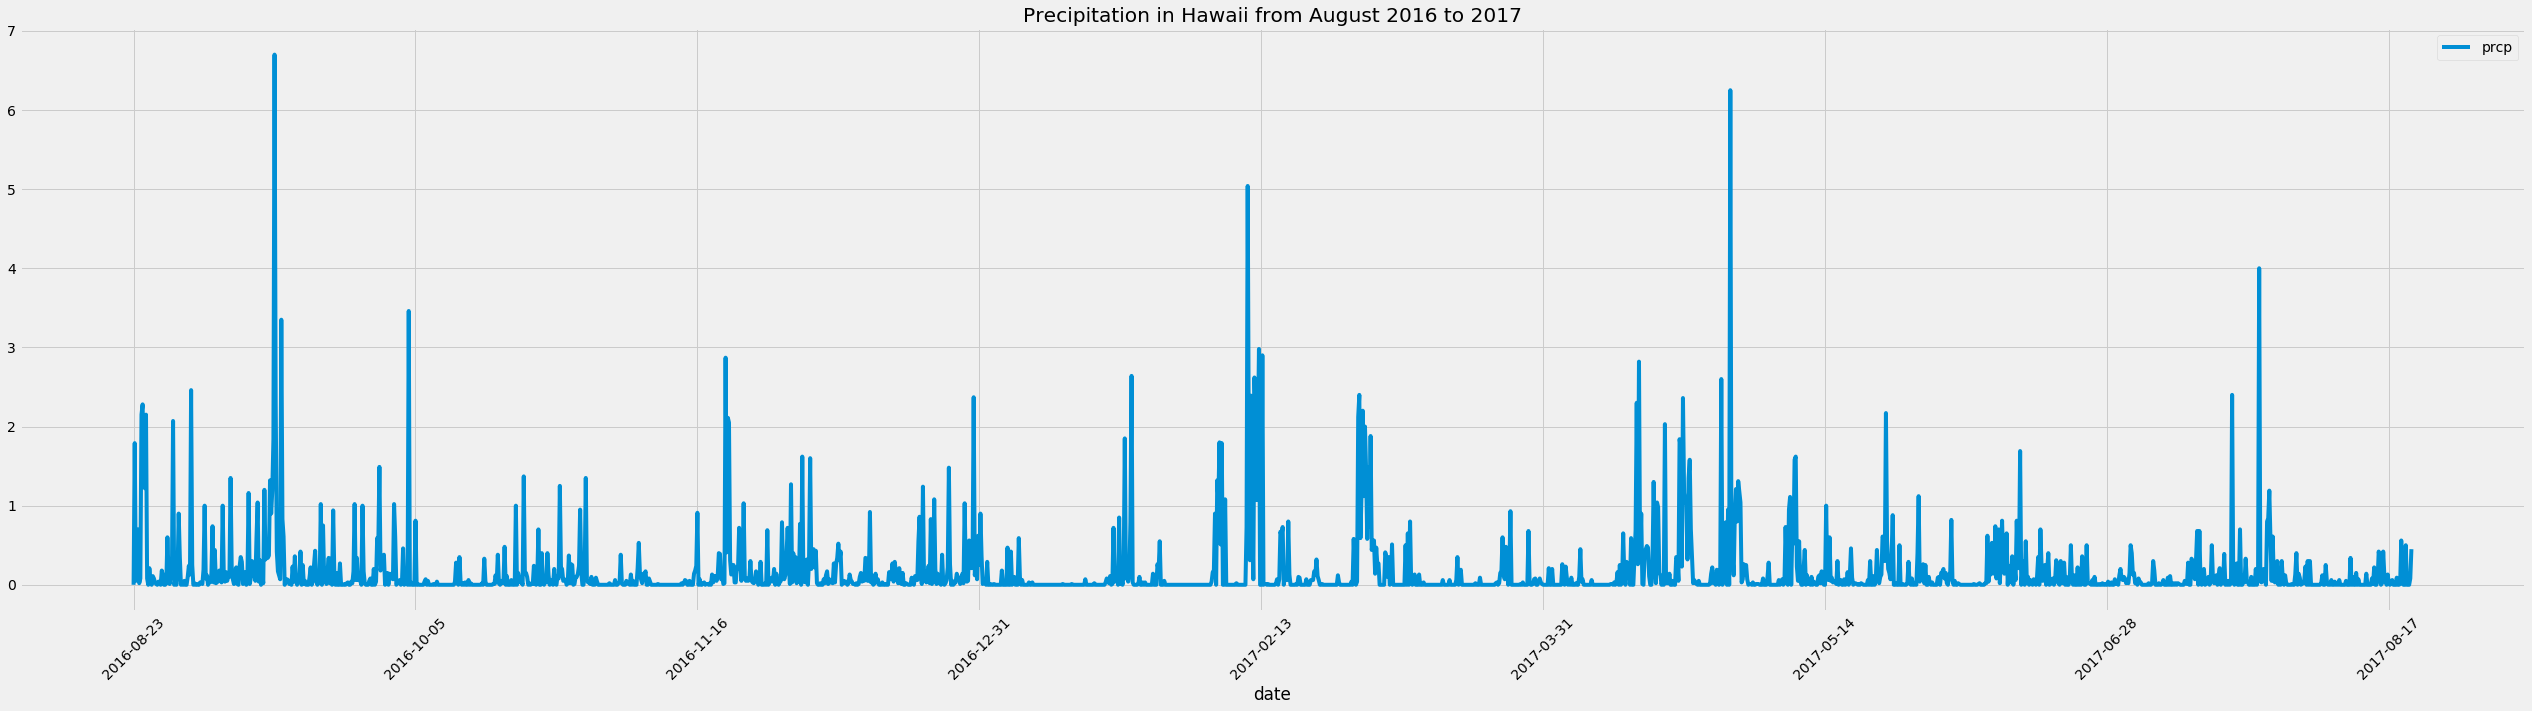

In [71]:
ax = IndexedPrcpDataDF.plot(title = 'Precipitation in Hawaii from August 2016 to 2017', rot = 45, figsize=(40,10))
ax.xaxis.set_minor_locator(mdates.DayLocator())

In [18]:
StartDate = dt.datetime.strptime(PrcpDataDF.date[0], DateFormat).date()
LastDateString = [x for x in LastDate]
LastDateString = LastDate[0]
EndDate = dt.datetime.strptime(LastDateString, DateFormat) - dt.timedelta(days=7)
EndDate = EndDate.date()
DateList = [StartDate]
EndDate

datetime.date(2017, 8, 16)

In [68]:
while StartDate <= EndDate:
    NextDate = StartDate + dt.timedelta(days=7)
    
    DateList.append(NextDate)
    StartDate = NextDate

StringDateList = [str(x) for x in DateList]

In [69]:
TickDF = IndexedPrcpDataDF.loc[StringDateList[0:]]

In [72]:
# Use Pandas to calcualte the summary statistics for the precipitation data
IndexedPrcpDataDF.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


#### # Use Pandas Plotting with Matplotlib to plot the data


In [82]:
# Design a query to show how many stations are available in this dataset?
StationCount = session.query(Measurement.station).group_by(Measurement.station).count()
print(f"There are {StationCount} stations.")

There are 9 stations.


In [124]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
StationFrequency = session.query(func.count(Measurement.station), Measurement.station).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
StationFrequency

[(2772, 'USC00519281'),
 (2724, 'USC00519397'),
 (2709, 'USC00513117'),
 (2669, 'USC00519523'),
 (2612, 'USC00516128'),
 (2202, 'USC00514830'),
 (1979, 'USC00511918'),
 (1372, 'USC00517948'),
 (511, 'USC00518838')]

In [121]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
MostActive = session.query(Measurement.tobs).filter(Measurement.station == StationFrequency[0][1]).all()
LowTemp = min(MostActive)
HighTemp = max(MostActive)
AvgTemp = round(np.average(MostActive),2)

71.66

In [126]:
# Choose the station with the highest number of temperature observations.
TempDataFrequency = StationFrequency = session.query(func.count(Measurement.tobs), Measurement.station).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
TempDataFrequency
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
LastDateMostActive = session.query(Measurement.date).filter(Measurement.station == StationFrequency[0][1]).order_by(Measurement.date.desc()).first()
# Calculate the date 1 year ago from the last data point in the database
YearBefore = dt.date(2017, 8, 18) - dt.timedelta(days=365)
#convert data for filtering
YearBeforeString = YearBefore.strftime(DateFormat)
YearBeforeString

'2016-08-18'

In [127]:
TempData = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= YearBeforeString).all()
TempData

[('2016-08-18', 80.0),
 ('2016-08-19', 77.0),
 ('2016-08-20', 80.0),
 ('2016-08-21', 76.0),
 ('2016-08-22', 77.0),
 ('2016-08-23', 81.0),
 ('2016-08-24', 79.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 79.0),
 ('2016-08-27', 77.0),
 ('2016-08-28', 78.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 79.0),
 ('2016-08-31', 80.0),
 ('2016-09-01', 81.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 79.0),
 ('2016-09-04', 75.0),
 ('2016-09-05', 79.0),
 ('2016-09-06', 76.0),
 ('2016-09-07', 76.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 78.0),
 ('2016-09-11', 76.0),
 ('2016-09-12', 78.0),
 ('2016-09-13', 78.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 80.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 81.0),
 ('2016-09-19', 77.0),
 ('2016-09-20', 77.0),
 ('2016-09-21', 78.0),
 ('2016-09-22', 76.0),
 ('2016-09-23', 82.0),
 ('2016-09-24', 81.0),
 ('2016-09-25', 78.0),
 ('2016-09-26', 80.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 79.0),
 ('2016-09-29', 80.0),
 ('2016-09-

In [129]:
TempDataDF = pd.DataFrame(TempData)
#sort values by date
TempDataDF = TempDataDF.sort_values('date')
#drop nulls
TempDataDF = TempDataDF.dropna()
TempDataDF
#reset index
IndexedTempDataDF = TempDataDF.set_index('date')
IndexedTempDataDF

,tobs
date,
2016-08-18,80.0
2016-08-18,81.0
2016-08-18,80.0
2016-08-18,79.0
2016-08-18,73.0
...,...
2017-08-22,76.0
2017-08-23,82.0
2017-08-23,82.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015F016B5048>]],
      dtype=object)

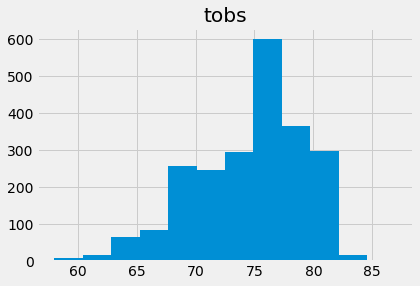

In [133]:
IndexedTempDataDF.hist(bins=12)

## Bonus Challenge Assignment

In [26]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [27]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [28]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [29]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [30]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [31]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [32]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [33]:
# Plot the daily normals as an area plot with `stacked=False`
